<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_ex_distribution_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Lab: Matplotlib **Distribuição, Quantidades, `Seaborn`**

Entenda aqui como empregar gráficos de distribuição, gráficos de barras e a biblioteca `seaborn`.

<br>

Referências e Materiais úteis para este Lab:

- Oliveira, R. (2022). [Visualizacao de Dados em Python](https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python) ISBN: 978-65-5545-511-3. [Editora Mackenzie](https://www.mackenzie.br/editora/livro/n/a/i/visualizacao-de-dados-com-python), [Amazon](https://www.amazon.com.br/VISUALIZA%C3%87%C3%83O-DADOS-PYTHON-ROGERIO-OLIVEIRA/dp/655545511X) ou [Martins Fontes](https://www.martinsfontespaulista.com.br/visualizacao-de-dados-com-python-997336/p)
<p>
  <img src="https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/raw/main/figuras/capas/1.png" width="30%" align="left"/>
</p>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

* Capítulo [Gráficos com Matplotlib](http://meusite.mackenzie.br/rogerio/MyBook/_build/html/c2_parte_1.html)

* Capítulo [Distribuição](http://meusite.mackenzie.br/rogerio/MyBook/_build/html/c4_parte_1.html)

* Capítulo [Quantidades e Proporções](http://meusite.mackenzie.br/rogerio/MyBook/_build/html/c5_parte_1.html)

* https://matplotlib.org/

* https://matplotlib.org/stable/tutorials/index.html

* https://matplotlib.org/stable/gallery/index.html


---



# Basic imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# **CASE: Boston Housing Dataset**

Os exercícios a seguir empregam o dataset Boston Housing Dataset. Este é um conjunto de dados coletado pelo US Census Service (1993) sobre moradias na área de Boston, MA. Estão presentes os seguintes dados das

- CRIM - taxa de criminalidade per capita por cidade
- ZN - proporção de terreno residencial zoneada para lotes acima de 25.000 m2.
- INDUS - proporção de hectares de negócios não varejistas por cidade.
- CHAS - Variável fictícia Charles River (1 se a área limita o rio; 0 caso contrário)
- NOX - concentração de óxidos nítricos (partes por 10 milhões)
- RM - número médio de divisões por habitação
- AGE - proporção de unidades ocupadas pelo proprietário construídas antes de 1940
- DIS - distâncias ponderadas para cinco centros de emprego de Boston
- RAD - índice de acessibilidade às rodovias radiais
- TAX - valor total do imposto predial por USD\$ 10.000
- PTRATIO - relação aluno-professor por município
B - 1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade
- LSTAT - % de status inferior da população
- MEDV - Valor médio de casas ocupadas pelo proprietário em US\$ 1.000

In [ ]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/BostonHousing.csv')
df.drop(columns='b',inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


# Exercício 1

Compare visualmente os valores médios das casas para os diferentes índices de acessibilidade às rodovias radiais, fazendo um gráfico do `matplotlib` e o equivalente do `seaborn`, ambos na mesma figura no modo `artist layer`.

Q. Qual índice de acessibilidade às rodovias radiais apresenta em média preços de casas maiores?

**Extra**: Você saberia corrigir o gráfico do `matplotlib` para uma melhor apresentação com os valores médios de cada `rad`? Dica: empregue `set_xticks()`.

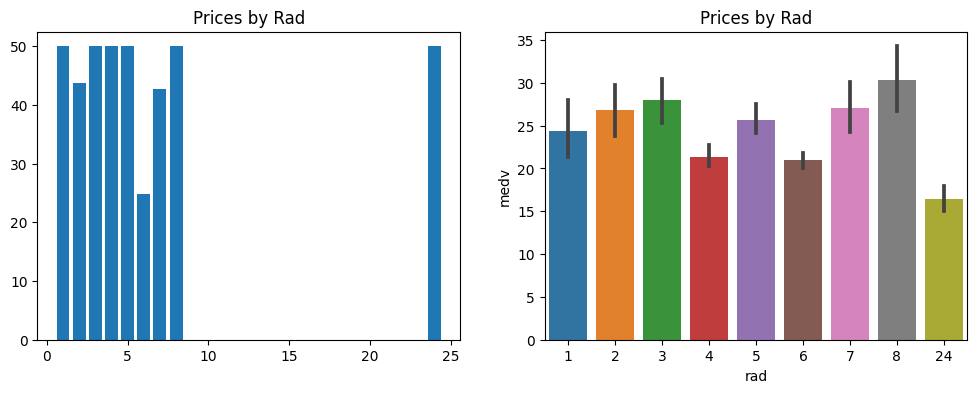

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

# depois tente empregar df2 no matplotlib e entenda a diferença
# df2 = df.copy()
# df2.rad = df.rad.astype('str')


ax[0].bar(x='rad',height='medv',data=df)
ax[0].set_title('Prices by Rad')

sns.barplot(x='rad',y='medv',data=df,ax=ax[1])
ax[1].set_title('Prices by Rad')

plt.show()

In [ ]:
df_group= df.groupby('rad').medv.mean()
df_group

rad
1     24.365000
2     26.833333
3     27.928947
4     21.387273
5     25.706957
6     20.976923
7     27.105882
8     30.358333
24    16.403788
Name: medv, dtype: float64

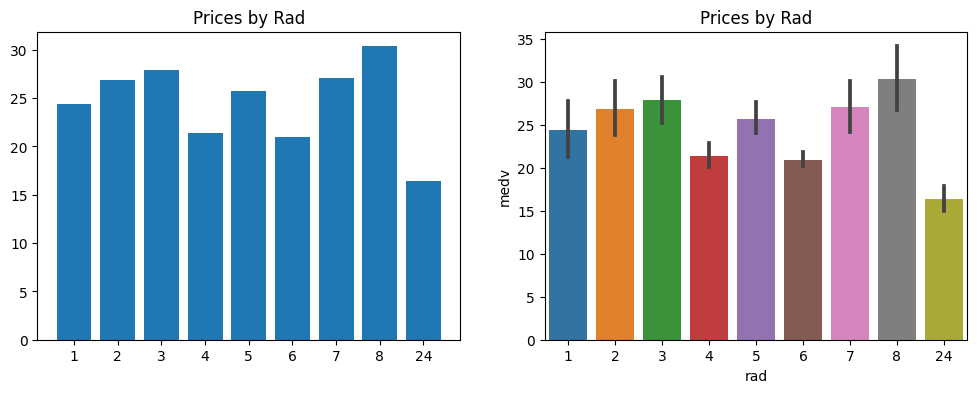

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].bar(x=np.arange(0,len(df_group)),height=df_group)
ax[0].set_xticks(np.arange(0,len(df_group)), labels=df_group.index)
ax[0].set_title('Prices by Rad')

sns.barplot(x='rad',y='medv',data=df,ax=ax[1])
ax[1].set_title('Prices by Rad')

plt.show()

# Exercício 2

Muitas vezes o valores médios apresentados nos gráficos anteriores podem esconder discrepâncias, como no caso de haver poucas instâncias de dados para um determinado `rad`. Faça um gráfico de barras para identificar os valores de casas que apresentam maior e menor incerteza.

Q. Para que índices de acessibilidade os valores apresentados das casas apresentam maior e menor incerteza?

**Extra**:
1. Você saberia dar destaque no gráfico para o valor de `rad` onde os preços apresentam maior incerteza?
2. Que solução você adotaria para poder comparar em um mesmo gráfico os preços e a incerteza, baseado no maior ou menor número de amostras?

Você poderia pensar em empregar um histograma... mas não parece uma boa ideia.

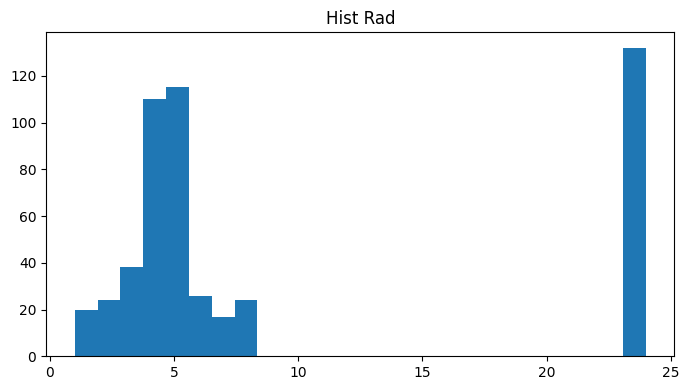

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))

ax.hist(x=df.rad,bins=25)
ax.set_title('Hist Rad')

plt.tight_layout()
plt.show()

Uma boa solução nestes casos é empregarmos `sns.countplot()`, caso você conheça esta função...

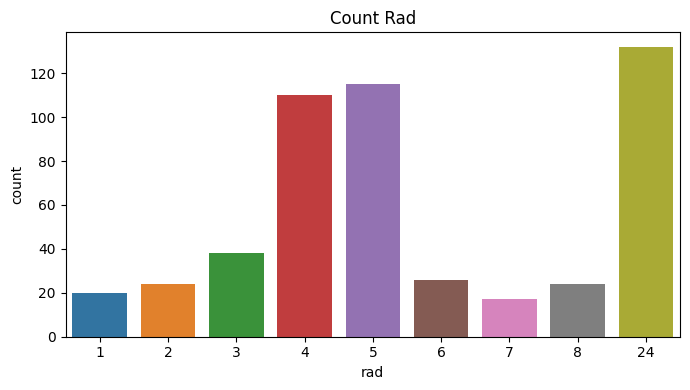

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))

sns.countplot(x=df.rad,ax=ax)
ax.set_title('Count Rad')

plt.tight_layout()
plt.show()

Ou você ainda pode construir um gráfico de barras para isso...

In [ ]:
df_group = df.groupby('rad')['rad'].count()
df_group

rad
1      20
2      24
3      38
4     110
5     115
6      26
7      17
8      24
24    132
Name: rad, dtype: int64

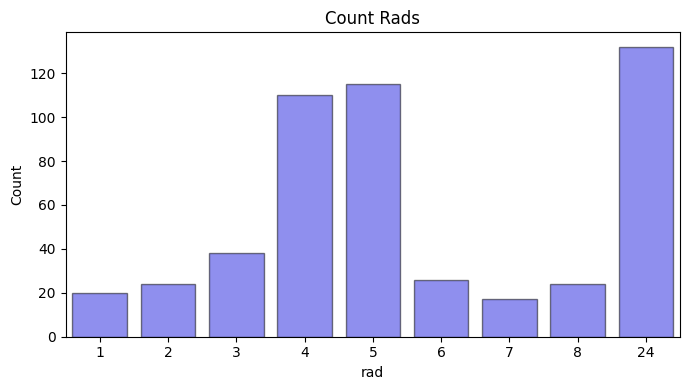

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))

sns.barplot(x=df_group.index,y=df_group,ax=ax,color='blue',edgecolor='k',alpha=0.5)
ax.set_title('Count Rads')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

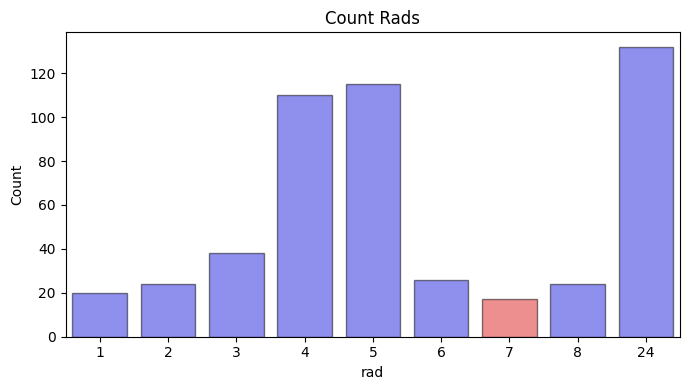

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))

color = {1:'b',2:'b',3:'b',4:'b',5:'b',6:'b',7:'r',8:'b',24:'b'}
sns.barplot(x=df_group.index,y=df_group,ax=ax,edgecolor='k',color='r',palette=color,alpha=0.5)

ax.set_title('Count Rads')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Exercício 3

A incerteza pode ser causada pela presença de *outliers* nos dados. Faça um gráfico de distribuição dos preços para cada índice de acessibilidade, com `matplotlib` e o equivalente com o `seaborn`, ambos na mesma figura no modo `artist layer`.

Q. Para que índices de acessibilidade apresentam preços com  mais incerteza por esse critério?

Q. Para que índices de acessibilidade apresentam preços com  maior possibilidade de valores discrepantes para baixo?

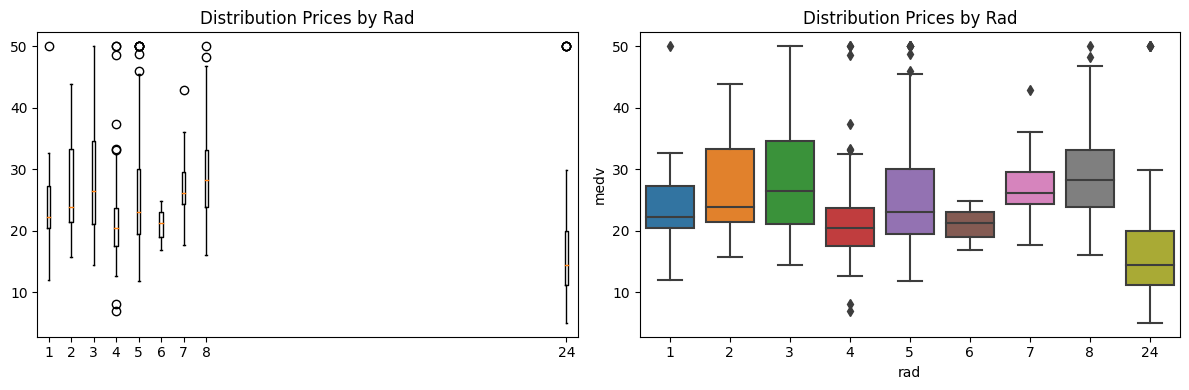

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

for r in df['rad'].unique():
  ax[0].boxplot(df[df.rad == r]['medv'], positions=[r])

ax[0].set_title('Distribution Prices by Rad')

sns.boxplot(x='rad',y='medv',data=df,ax=ax[1])
ax[1].set_title('Distribution Prices by Rad')

plt.tight_layout()
plt.show()

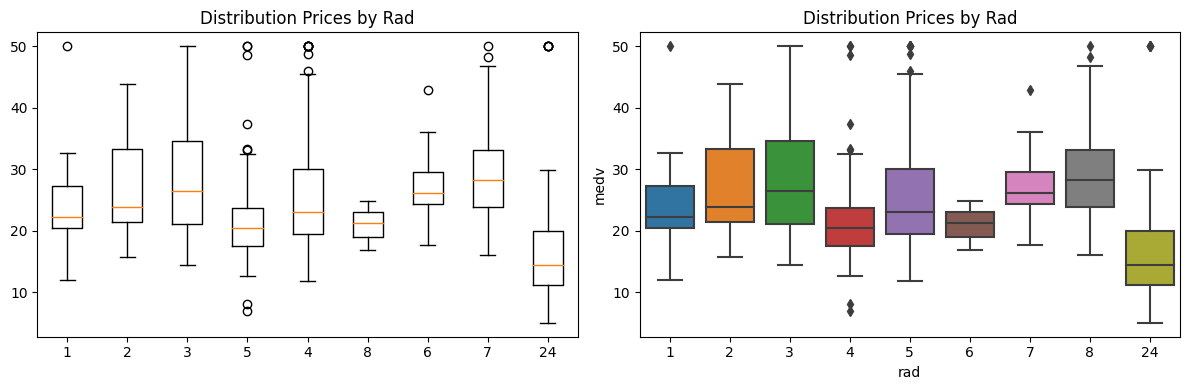

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

data = []
# for r in df['rad'].unique():
for r in sorted(df['rad'].unique()):
  data.append(df[df.rad == r]['medv'])

ax[0].boxplot(data)
ax[0].set_title('Distribution Prices by Rad')
ax[0].set_xticks(np.arange(1,len(df_group)+1), labels=df['rad'].unique())

sns.boxplot(x='rad',y='medv',data=df,ax=ax[1])
ax[1].set_title('Distribution Prices by Rad')

plt.tight_layout()
plt.show()

# Exercício 4

Outro aspecto importante sobre os dados é a sua distribuição. Faça os gráficos de distribuição dos seguintes valores:

```
['crim', 'indus', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']
```

De preferência empregue múltiplos gráficos na mesma figura. Empregue o `matplotlib` ou o `seaborn`, como preferir. Em seguida responda as perguntas.

Q. Qual atributo apresenta uma distribuição claramente bicaudal?

Q. Qual atributo apresenta uma distribuição mais próxima da normal?

Q. Qual é aproximadamente a probabilidade um imóvel estar a menos de 5 milhas dos centros de emprego?

Q. Qual é aproximadamente a probabilidade um imóvel ter um preço inferior a USD 22000?


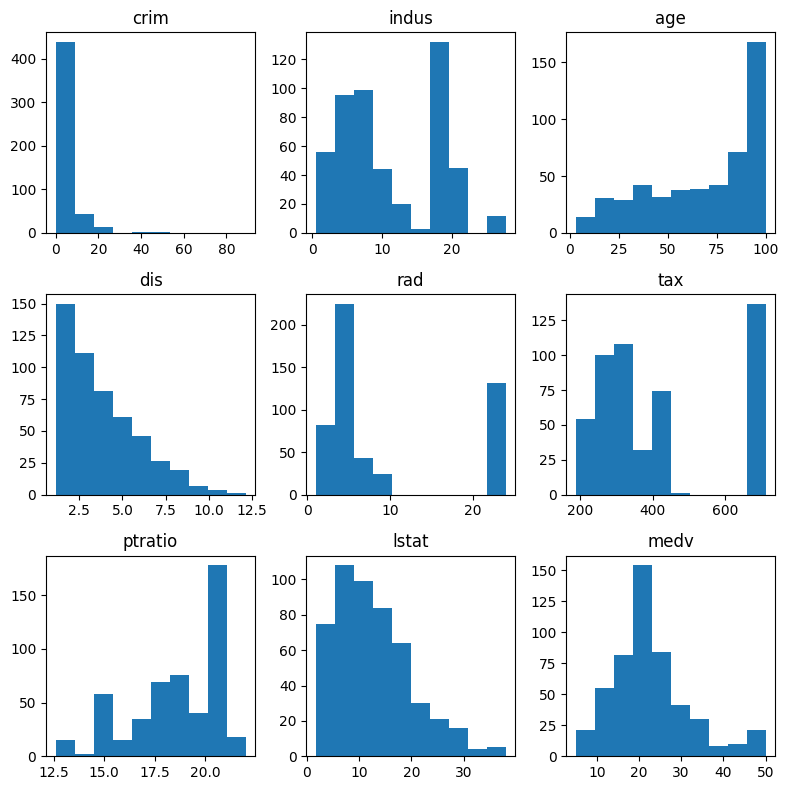

In [ ]:
fig, axis = plt.subplots(3,3, figsize=(8,8))

ax = axis.reshape(-1)

cols = ['crim', 'indus', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

for i in range(len(cols)):
  ax[i].hist(df[cols[i]])
  ax[i].set_title(cols[i])

plt.tight_layout()
plt.show()

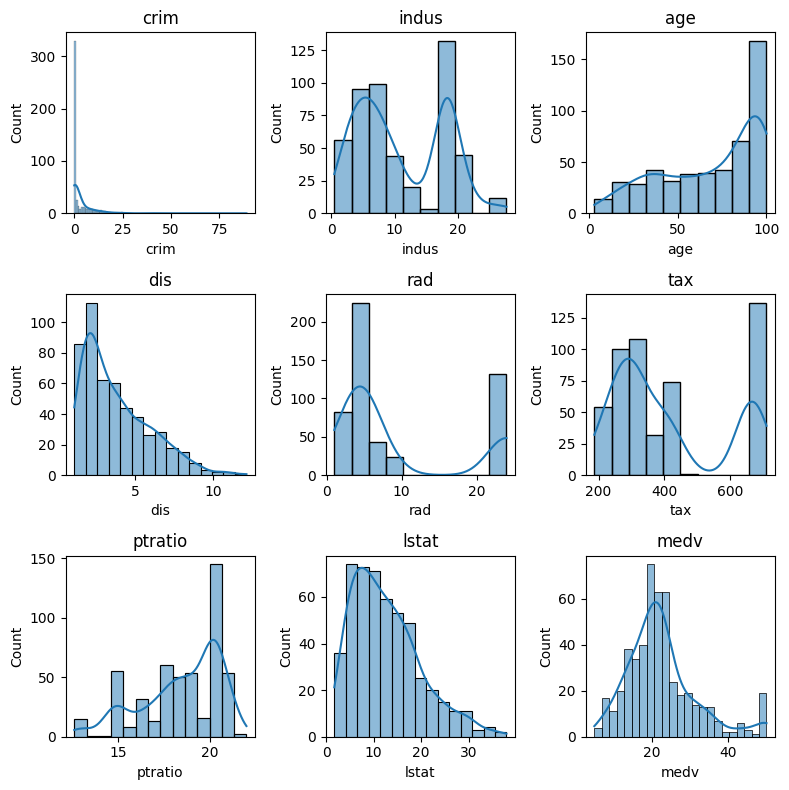

In [ ]:
fig, axis = plt.subplots(3,3, figsize=(8,8))

ax = axis.reshape(-1)

cols = ['crim', 'indus', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

for i in range(len(cols)):
  sns.histplot(df[cols[i]],ax=ax[i],kde=True)
  ax[i].set_title(cols[i])

plt.tight_layout()
plt.show()